In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from scipy.stats import zscore

In [30]:
titanic = pd.read_csv('/content/drive/MyDrive/Projects/Titanic - Machine Learning from Disaster/train.csv')

In [31]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [32]:
titanic.shape

(891, 12)

In [33]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


*Data Cleaning*

In [34]:
titanic.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


<Axes: >

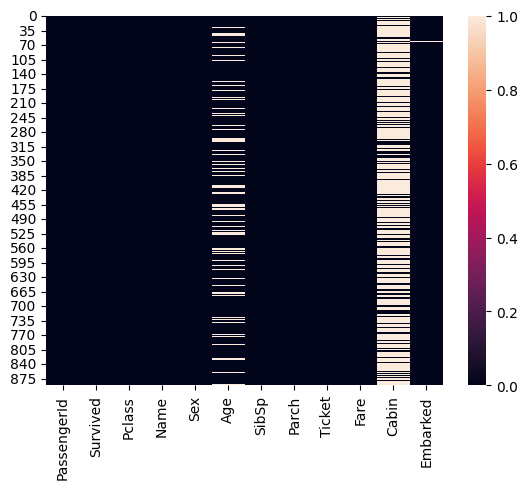

In [35]:
sns.heatmap(titanic.isnull())

*There are missing values*

In [36]:
titanic['Age'].fillna(titanic['Age'].mean(), inplace=True)

/tmp/ipython-input-1013071036.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['Age'].fillna(titanic['Age'].mean(), inplace=True)


<Axes: >

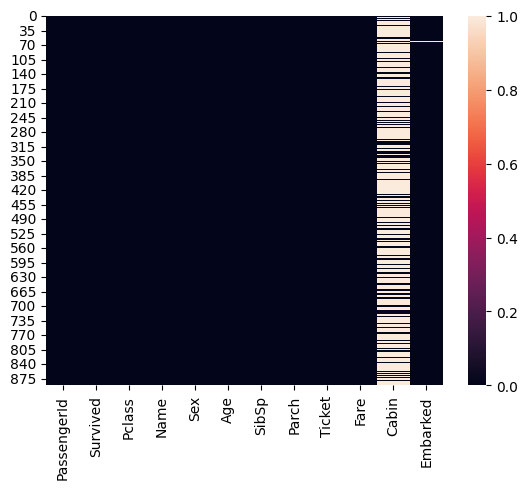

In [37]:
sns.heatmap(titanic.isnull())

In [39]:
titanic.drop(['Cabin','PassengerId', 'Name', 'Ticket'] , axis=1, inplace=True)

In [40]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [41]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [44]:
titanic['Sex'].value_counts()

,count
Sex,
male,577
female,314


In [54]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

label_mappings = {}

for col in titanic.select_dtypes('object'):
    titanic[col] = encoder.fit_transform(titanic[col])
    label_mappings[col] = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))

for col, mapping in label_mappings.items():
    print(f"Column: {col}")
    for label, code in mapping.items():
        print(f"{code} -> {label}")
    print()

Column: Sex
0 -> female
1 -> male

Column: Embarked
0 -> C
1 -> Q
2 -> S
3 -> nan



In [64]:
titanic['Embarked'].value_counts()

,count
Embarked,
2,644
0,168
1,77
3,2


In [65]:
titanic = titanic[titanic['Embarked'] != 3]

In [66]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    int64  
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 62.5 KB


In [67]:
titanic['Embarked'].value_counts()

,count
Embarked,
2,644
0,168
1,77


In [68]:
titanic.shape

(889, 8)

/tmp/ipython-input-1467707904.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Survived', data = titanic, palette='pastel')


<Axes: xlabel='Survived', ylabel='count'>

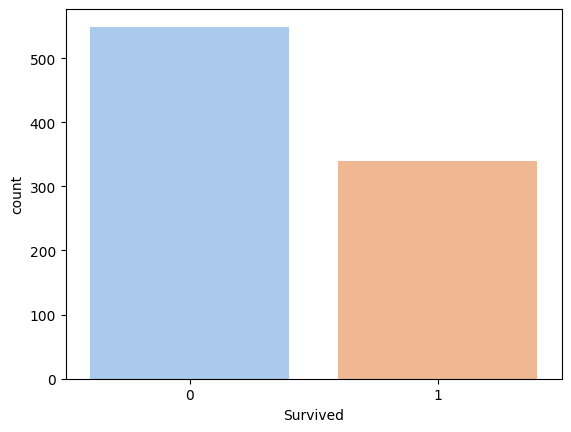

In [71]:
sns.countplot(x = 'Survived', data = titanic, palette='pastel')

<Axes: xlabel='Survived', ylabel='count'>

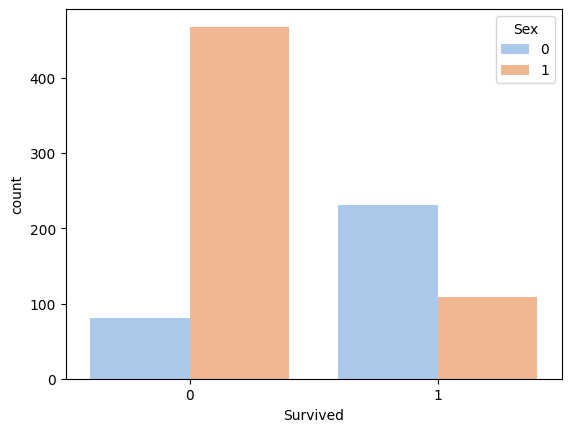

In [72]:
sns.countplot(x = 'Survived', data = titanic, hue='Sex' , palette='pastel')

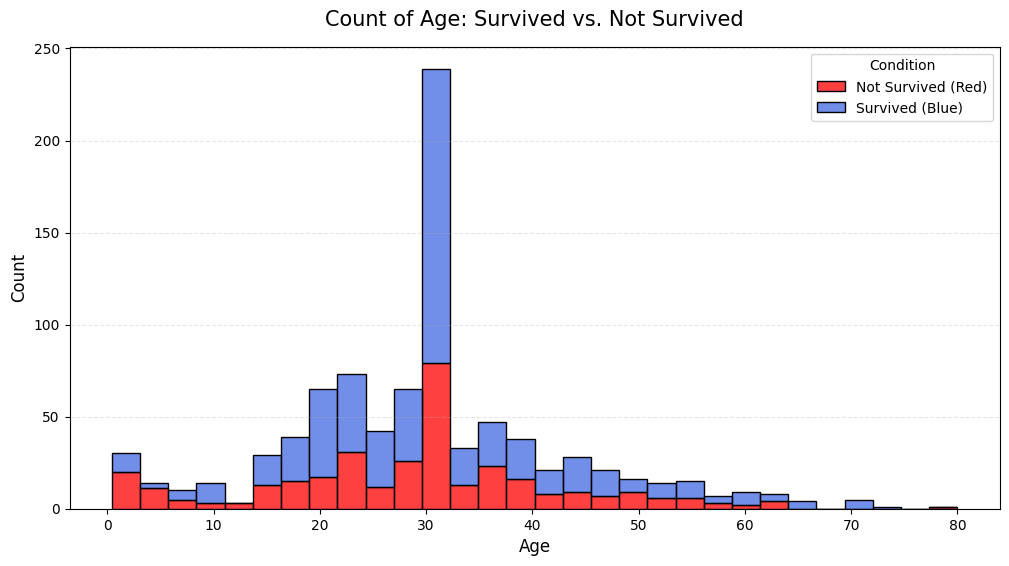

In [74]:
plt.figure(figsize=(12, 6))
custom_palette = {1: "red", 0: "royalblue"}

sns.histplot(data=df, x='Age', hue='Survived',
             multiple='stack',
             palette=custom_palette,
             hue_order=[0, 1],
             bins=30)

plt.title('Count of Age: Survived vs. Not Survived', fontsize=15, pad=15)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.legend(title='Condition', labels=['Not Survived (Red)', 'Survived (Blue)'])
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()

In [138]:
from sklearn.model_selection import train_test_split

X = titanic.drop('Survived',axis = 1)
y = titanic['Survived']

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape,X_test.shape)

(711, 7) (178, 7)


# Logistic Regression

In [140]:
from sklearn.linear_model import LogisticRegression

model1 = LogisticRegression(max_iter=5000, class_weight='balanced')
model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)

In [141]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[83, 26],
       [12, 57]])

In [143]:
from sklearn.metrics import accuracy_score, classification_report
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.7865168539325843
              precision    recall  f1-score   support

           0       0.87      0.76      0.81       109
           1       0.69      0.83      0.75        69

    accuracy                           0.79       178
   macro avg       0.78      0.79      0.78       178
weighted avg       0.80      0.79      0.79       178

[[83 26]
 [12 57]]


# SVC

In [144]:
from sklearn.svm import SVC

model2 = SVC(kernel='linear', C=1, class_weight='balanced')
model2.fit(X_train, y_train)
y_pred = model2.predict(X_test)

In [145]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8033707865168539
              precision    recall  f1-score   support

           0       0.86      0.82      0.84       109
           1       0.73      0.78      0.76        69

    accuracy                           0.80       178
   macro avg       0.79      0.80      0.80       178
weighted avg       0.81      0.80      0.80       178

[[89 20]
 [15 54]]


# Random Forest

In [146]:
from sklearn.ensemble import RandomForestClassifier

model3 = RandomForestClassifier(n_estimators=200, random_state=42)
model3.fit(X_train, y_train)
y_pred = model3.predict(X_test)



In [147]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.7584269662921348
              precision    recall  f1-score   support

           0       0.83      0.76      0.79       109
           1       0.67      0.75      0.71        69

    accuracy                           0.76       178
   macro avg       0.75      0.76      0.75       178
weighted avg       0.77      0.76      0.76       178

[[83 26]
 [17 52]]


# Gradient Boosting

In [148]:
from sklearn.ensemble import GradientBoostingClassifier
model4 = GradientBoostingClassifier()
model4.fit(X_train, y_train)
y_pred = model4.predict(X_test)

In [149]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8146067415730337
              precision    recall  f1-score   support

           0       0.85      0.84      0.85       109
           1       0.76      0.77      0.76        69

    accuracy                           0.81       178
   macro avg       0.80      0.81      0.81       178
weighted avg       0.82      0.81      0.81       178

[[92 17]
 [16 53]]


# Naive Bayes

In [150]:
from sklearn.naive_bayes import GaussianNB
model5= GaussianNB()
model5.fit(X_train, y_train)
y_pred = model5.predict(X_test)

In [151]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.7752808988764045
              precision    recall  f1-score   support

           0       0.84      0.78      0.81       109
           1       0.69      0.77      0.73        69

    accuracy                           0.78       178
   macro avg       0.76      0.77      0.77       178
weighted avg       0.78      0.78      0.78       178

[[85 24]
 [16 53]]


# Decision Tree

In [152]:
from sklearn.tree import DecisionTreeClassifier

mode6 = DecisionTreeClassifier(max_depth=5, random_state=42)
mode6.fit(X_train, y_train)
y_pred = mode6.predict(X_test)


In [153]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8258426966292135
              precision    recall  f1-score   support

           0       0.82      0.92      0.87       109
           1       0.84      0.68      0.75        69

    accuracy                           0.83       178
   macro avg       0.83      0.80      0.81       178
weighted avg       0.83      0.83      0.82       178

[[100   9]
 [ 22  47]]


# K-Nearest Neighbors (KNN)

In [154]:
from sklearn.neighbors import KNeighborsClassifier

mode7 = KNeighborsClassifier(n_neighbors=5)
mode7.fit(X_train, y_train)
y_pred = mode7.predict(X_test)


In [155]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.7078651685393258
              precision    recall  f1-score   support

           0       0.73      0.83      0.78       109
           1       0.65      0.52      0.58        69

    accuracy                           0.71       178
   macro avg       0.69      0.67      0.68       178
weighted avg       0.70      0.71      0.70       178

[[90 19]
 [33 36]]
